In [1]:
%matplotlib widget
from typing import Tuple, Dict
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import networkx as nx
from tqdm import tqdm

import seaborn as sns

from opinion_model import (
    average_k,
    generate_opinions, describe_graph,
    Opinion, balance_opinions,
    SUGGESTABILITY_KEY, OPINION_KEY
)

In [2]:
def load_data(path: str, processed: bool = True):
    file = 'processed.csv' if processed else 'raw.csv'
    index_col = 0 if processed else None
    return pd.read_csv(os.path.join(path, file), index_col=index_col)

# Один f от плотности византийских нод

In [3]:
k8_data = load_data('./data/byzantine/compact_sequential_erd_ren_k8_n2000')
k12_data = load_data('./data/byzantine/compact_sequential_erd_ren_k12_n2000')

In [4]:
k12_data

,f,byzantine_prob,fraction_mean,fraction_std,n_minus_components_mean,n_minus_components_std,s1_mean,s1_std,s2_mean,s2_std,stable_mean,stable_std,s1_persistence_mean,s1_persistence_std,s2_persistence_mean,s2_persistence_std,s1_change_op_mean,s1_change_op_std,s2_change_op_mean,s2_change_op_std
sug,,,,,,,,,,,,,,,,,,,,
8,0.15,0.00,0.063054,0.014060,6.4980,2.921175,0.054805,0.017826,0.002738,0.002397,1.0,0.0,0.913464,0.045136,0.908090,0.211330,0.086536,0.045136,0.091910,0.211330
8,0.15,0.10,0.110711,0.009076,4.4115,2.218474,0.106550,0.010713,0.001532,0.000986,1.0,0.0,0.960475,0.020641,0.964200,0.160296,0.039525,0.020641,0.035800,0.160296
8,0.15,0.25,0.137346,0.004628,2.8590,1.593546,0.135187,0.005790,0.001061,0.000807,1.0,0.0,0.987378,0.010296,0.989996,0.094255,0.012622,0.010296,0.010004,0.094255
8,0.15,0.50,0.155011,0.003708,1.9705,1.073874,0.153968,0.003825,0.000663,0.000623,1.0,0.0,0.992391,0.007176,0.993277,0.079137,0.007609,0.007176,0.006723,0.079137
8,0.15,0.75,0.227808,0.012939,7.4570,2.620799,0.221008,0.013603,0.001298,0.000553,1.0,0.0,0.921612,0.020306,0.924029,0.242665,0.078388,0.020306,0.075971,0.242665
12,0.15,0.00,0.140472,0.003397,1.6460,0.847964,0.139718,0.003858,0.000561,0.000734,1.0,0.0,0.990385,0.008480,0.988200,0.105797,0.009615,0.008480,0.011800,0.105797
12,0.15,0.10,0.145841,0.002267,1.4095,0.707149,0.145373,0.002659,0.000364,0.000612,1.0,0.0,0.995756,0.005573,0.997821,0.042588,0.004244,0.005573,0.002179,0.042588
12,0.15,0.25,0.148982,0.001043,1.1675,0.456671,0.148791,0.001354,0.000162,0.000439,1.0,0.0,0.998970,0.002681,1.000000,0.000000,0.001030,0.002681,0.000000,0.000000
12,0.15,0.50,0.150144,0.000481,1.0225,0.164339,0.150120,0.000506,0.000021,0.000150,1.0,0.0,0.999777,0.001232,1.000000,0.000000,0.000223,0.001232,0.000000,0.000000


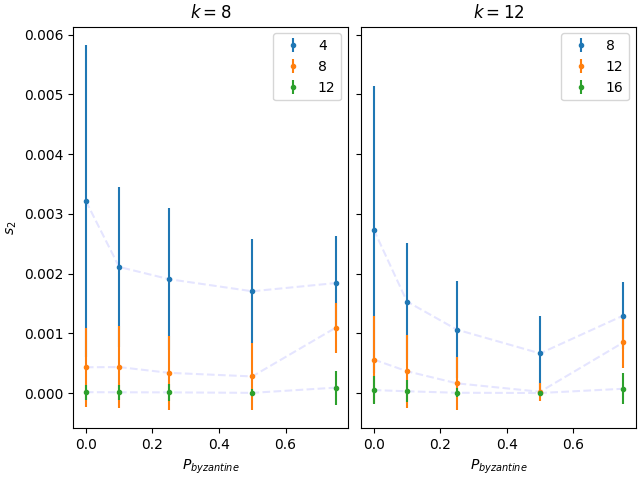

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, layout='constrained')
ax1.set_title('$k=8$')
ax2.set_title('$k=12$')
for sug in k8_data.index.unique():
    ax1.errorbar(k8_data.loc[sug].byzantine_prob, k8_data.loc[sug].s1_mean, yerr=k8_data.loc[sug].s1_std, fmt='.', label=f'{sug}')
    ax1.plot(k8_data.loc[sug].byzantine_prob, k8_data.loc[sug].s1_mean, 'b--', alpha=0.1)
for sug in k12_data.index.unique():
    ax2.errorbar(k12_data.loc[sug].byzantine_prob, k12_data.loc[sug].s1_mean, yerr=k12_data.loc[sug].s1_std, fmt='.', label=f'{sug}')
    ax2.plot(k12_data.loc[sug].byzantine_prob, k12_data.loc[sug].s1_mean, 'b--', alpha=0.1)

ax1.legend()
ax2.legend()

ax1.set_xlabel('$P_{byzantine}$')
ax2.set_xlabel('$P_{byzantine}$')
ax1.set_ylabel('$s_1$')

plt.savefig('figures/byzantine/s1_from_byz_with_error.png')

# Зависимость от f

In [3]:
k8_data = load_data('./data/byzantine/compact_sequential_erd_ren_k8_n2000_over_f/')
k12_data = load_data('./data/byzantine/compact_sequential_erd_ren_k12_n2000_over_f/')

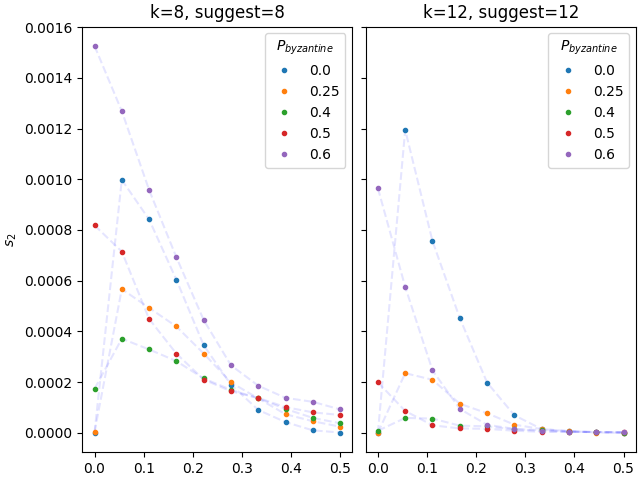

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, layout='constrained', sharey=True)

for i, byz_prob in enumerate(k8_data.byzantine_prob.unique()):
    k8 = k8_data[k8_data.byzantine_prob == byz_prob]
    k12 = k12_data[k12_data.byzantine_prob == byz_prob]
    ax1.errorbar(k8['f'], k8['s2_mean'], fmt='.', label=f'{byz_prob}')
    ax1.plot(k8['f'], k8['s2_mean'], 'b--', alpha=0.1)
    ax2.errorbar(k12['f'], k12['s2_mean'], fmt='.', label=f'{byz_prob}')
    ax2.plot(k12['f'], k12['s2_mean'], 'b--', alpha=0.1)

ax1.set_title('k=8, suggest=8')
ax2.set_title('k=12, suggest=12')
ax1.set_ylabel('$s_2$')

ax1.legend().set_title('$P_{byzantine}$')
ax2.legend().set_title('$P_{byzantine}$')
plt.savefig('figures/byzantine/f_vs_s2.png')

In [23]:

ax1.get_legend().set_title('byzantine_prob')

In [6]:
k8_data.head()

,f,byzantine_prob,fraction_mean,fraction_std,n_minus_components_mean,n_minus_components_std,s1_mean,s1_std,s2_mean,s2_std,stable_mean,stable_std,s1_persistence_mean,s1_persistence_std,s2_persistence_mean,s2_persistence_std,s1_change_op_mean,s1_change_op_std,s2_change_op_mean,s2_change_op_std
sug,,,,,,,,,,,,,,,,,,,,
8,0.0,0.00,0.001435,0.000753,0.8400,0.366698,0.001435,0.000753,0.000000,0.000000,1.0,0.0,0.999405,0.024398,NaN,NaN,0.000595,0.024398,NaN,NaN
8,0.0,0.25,0.001911,0.000320,0.9940,0.099845,0.001909,0.000317,0.000002,0.000045,1.0,0.0,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.0,0.40,0.002178,0.000468,1.1910,0.437738,0.001987,0.000151,0.000173,0.000378,1.0,0.0,0.999750,0.011180,0.997110,0.053760,0.000250,0.011180,0.002890,0.053760
8,0.0,0.50,0.003646,0.001388,2.5625,1.294964,0.002044,0.000253,0.000818,0.000476,1.0,0.0,0.998250,0.029536,0.996472,0.057942,0.001750,0.029536,0.003528,0.057942
8,0.0,0.60,0.010974,0.003737,8.8890,3.106043,0.002340,0.000690,0.001526,0.000556,1.0,0.0,0.991742,0.058188,0.992492,0.069769,0.008258,0.058188,0.007508,0.069769


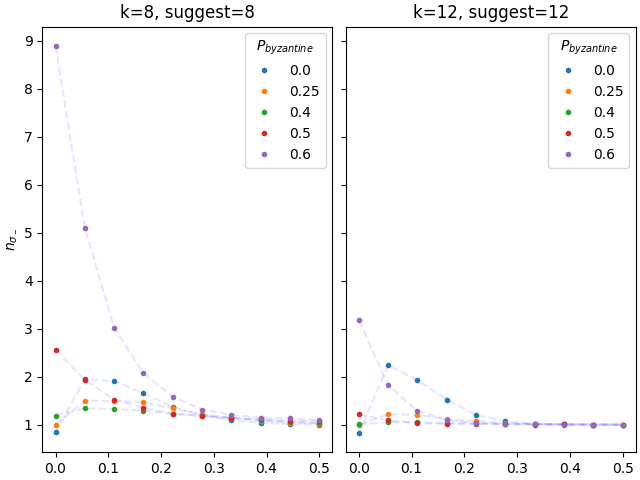

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, layout='constrained', sharey=True)

for i, byz_prob in enumerate(k8_data.byzantine_prob.unique()):
    k8 = k8_data[k8_data.byzantine_prob == byz_prob]
    k12 = k12_data[k12_data.byzantine_prob == byz_prob]
    ax1.errorbar(k8['f'], k8['n_minus_components_mean'], fmt='.', label=f'{byz_prob}')
    ax1.plot(k8['f'], k8['n_minus_components_mean'], 'b--', alpha=0.1)
    ax2.errorbar(k12['f'], k12['n_minus_components_mean'], fmt='.', label=f'{byz_prob}')
    ax2.plot(k12['f'], k12['n_minus_components_mean'], 'b--', alpha=0.1)

ax1.set_title('k=8, suggest=8')
ax2.set_title('k=12, suggest=12')
ax1.set_ylabel('$n_{\sigma_-}$')

ax1.legend().set_title('$P_{byzantine}$')
ax2.legend().set_title('$P_{byzantine}$')
plt.savefig('figures/byzantine/f_vs_nminus.png')

,f,byzantine_prob,fraction_mean,fraction_std,n_minus_components_mean,n_minus_components_std,s1_mean,s1_std,s2_mean,s2_std,stable_mean,stable_std,s1_persistence_mean,s1_persistence_std,s2_persistence_mean,s2_persistence_std,s1_change_op_mean,s1_change_op_std,s2_change_op_mean,s2_change_op_std
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.0,50.0,50.000000,50.000000,49.000000,49.000000,50.000000,50.000000,49.000000,49.000000
mean,0.250000,0.350000,0.250191,0.001638,1.559600,0.639042,0.249551,0.001795,0.000320,0.000511,1.0,0.0,0.997427,0.005707,0.996573,0.041297,0.002573,0.005707,0.003427,0.041297
std,0.161191,0.211891,0.160628,0.000747,1.250872,0.535049,0.161247,0.000835,0.000342,0.000329,0.0,0.0,0.002299,0.009280,0.003612,0.037056,0.002299,0.009280,0.003612,0.037056
min,0.000000,0.000000,0.001435,0.000320,0.840000,0.031615,0.001435,0.000151,0.000000,0.000000,1.0,0.0,0.990689,0.000000,0.987448,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.111111,0.250000,0.111781,0.001269,1.089500,0.330054,0.111303,0.001427,0.000091,0.000304,1.0,0.0,0.997648,0.002086,0.994100,0.000000,0.001403,0.002086,0.000000,0.000000
50%,0.250000,0.400000,0.249532,0.001388,1.202250,0.493227,0.249121,0.001632,0.000188,0.000433,1.0,0.0,0.998326,0.002822,0.997207,0.052140,0.001674,0.002822,0.002793,0.052140
75%,0.388889,0.500000,0.388598,0.001701,1.486500,0.798109,0.388499,0.002160,0.000438,0.000641,1.0,0.0,0.998597,0.004901,1.000000,0.075378,0.002352,0.004901,0.005900,0.075378
max,0.500000,0.600000,0.500448,0.003737,8.889000,3.106043,0.500447,0.004226,0.001526,0.001411,1.0,0.0,1.000000,0.058188,1.000000,0.111565,0.009311,0.058188,0.012552,0.111565


In [3]:
k8_zero_data = load_data('./data/byzantine/compact_sequential_erd_ren_k8_n2000_over_f_sug0/')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


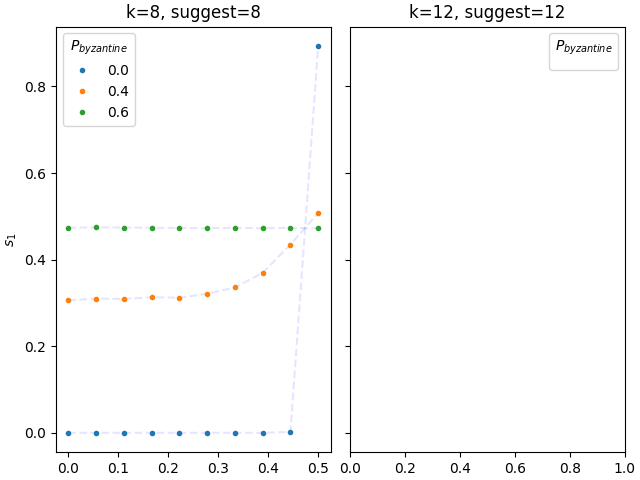

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, layout='constrained', sharey=True)

for i, byz_prob in enumerate(k8_zero_data.byzantine_prob.unique()):
    k8 = k8_zero_data[k8_zero_data.byzantine_prob == byz_prob]
    # k12 = k12_data[k12_data.byzantine_prob == byz_prob]
    ax1.errorbar(k8['f'], k8['s1_mean'], fmt='.', label=f'{byz_prob}')
    ax1.plot(k8['f'], k8['s1_mean'], 'b--', alpha=0.1)
    # ax2.errorbar(k12['f'], k12['s2_mean'], fmt='.', label=f'{byz_prob}')
    # ax2.plot(k12['f'], k12['s2_mean'], 'b--', alpha=0.1)

ax1.set_title('k=8, suggest=8')
ax2.set_title('k=12, suggest=12')
ax1.set_ylabel('$s_1$')

ax1.legend().set_title('$P_{byzantine}$')
ax2.legend().set_title('$P_{byzantine}$')
# plt.savefig('figures/byzantine/f_vs_s2.png')

# При убеждаемости 0 и 1

In [3]:
k4_data = load_data('data/byzantine/compact_sequential_erd_ren_k4_n2000_over_f_sug0/')
k4_data_big = load_data('data/byzantine/compact_sequential_erd_ren_k4_n2000_over_f_sug0_BIG/')
k4_data_parallel = load_data('data/byzantine/compact_parallel_erd_ren_k4_n2000_over_f_sug0/')
k4_other_data = load_data('data/byzantine/compact_sequential_erd_ren_k4_n2000_over_f_sug26/')

In [4]:
k4_data.head()

,f,byzantine_prob,fraction_mean,fraction_std,n_minus_components_mean,n_minus_components_std,s1_mean,s1_std,s2_mean,s2_std,stable_mean,stable_std,s1_persistence_mean,s1_persistence_std,s2_persistence_mean,s2_persistence_std,s1_change_op_mean,s1_change_op_std,s2_change_op_mean,s2_change_op_std
sug,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.0,0.000064,0.000362,0.031,0.173404,0.000064,0.000362,0.000000,0.000000,1.0,0.0,1.000000,0.000000,NaN,NaN,0.000000,0.000000,NaN,NaN
0,0.000000,0.4,0.292095,0.035136,98.771,12.297552,0.151339,0.056798,0.011069,0.008461,0.0,0.0,0.493489,0.089524,0.488642,0.194675,0.292668,0.052245,0.300977,0.171602
0,0.000000,0.6,0.478927,0.023511,137.001,15.190186,0.307419,0.044099,0.006813,0.004371,0.0,0.0,0.185974,0.048073,0.193507,0.175730,0.479269,0.034261,0.477603,0.218164
0,0.052632,0.0,0.002147,0.003489,0.462,0.639504,0.001942,0.003165,0.000191,0.000763,1.0,0.0,0.951000,0.110168,0.961520,0.120573,0.047425,0.109658,0.038480,0.120573
0,0.052632,0.4,0.307850,0.032487,95.278,12.198833,0.178287,0.051948,0.008890,0.007082,0.0,0.0,0.442644,0.078117,0.451201,0.217640,0.318201,0.044845,0.312275,0.192276


In [14]:
def align_yaxis(ax1, v1, ax2, v2):
    """adjust ax2 ylimit so that v2 in ax2 is aligned to v1 in ax1"""
    _, y1 = ax1.transData.transform((0, v1))
    _, y2 = ax2.transData.transform((0, v2))
    inv = ax2.transData.inverted()
    _, dy = inv.transform((0, 0)) - inv.transform((0, y1-y2))
    miny, maxy = ax2.get_ylim()
    # print(miny+dy, maxy+dy)
    ax2.set_ylim(miny+dy, maxy+dy)


def create_joined_plot(
        fig: plt.Figure,
        main_ax: plt.Axes,
        data: pd.DataFrame,
        plot_s2_err: bool = True,
        show_xlabel: bool = True,
        show_ylabel=True,
        show_2ylabel: bool = True,
        v1=0, v2=0,
        show_legend: bool = False,
        fontsize: int = 18
        ):
    color = 'tab:red'

    if show_xlabel:
        main_ax.set_xlabel('f', fontsize=fontsize)
    if show_ylabel:
        main_ax.set_ylabel('fraction, $s_1$', color=color, fontsize=fontsize)
    main_ax.grid(True)

    # main_ax.set_ylim(bottom=0, top=1)
    main_ax.plot(data.f, data.fraction_mean, '--r', alpha=0.3)
    main_ax.fill_between(data.f, data.fraction_mean - data.fraction_std, data.fraction_mean + data.fraction_std,
                     color='gray', alpha=0.2)

    lns2 = main_ax.plot(data.f, data.s1_mean, '.g', label='s1')
    main_ax.plot(data.f, data.s1_mean, '--g', alpha=0.3)

    lns1 = main_ax.plot(data.f, data.fraction_mean, '.r', label='fraction')

    secondary_ax = main_ax.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    if show_2ylabel:
        secondary_ax.set_ylabel('$s_2$', color=color, fontsize=fontsize)  # we already handled the x-label with ax1
    lns3 = secondary_ax.plot(data.f, data.s2_mean, '.b', label='s2')
    secondary_ax.plot(data.f, data.s2_mean, '--', alpha=0.3)
    if plot_s2_err:
        secondary_ax.fill_between(data.f, data.s2_mean - data.s2_std, data.s2_mean + data.s2_std,
                         color='gray', alpha=0.1)
    # ax2.errorbar(result.index, result.s2_mean, fmt='.', color=color, yerr=result.s2_std, label='s2')
    secondary_ax.tick_params(axis='y', labelcolor=color)
    secondary_ax.set_ybound(upper=data.s2_mean.max() + 0.001)

    if show_legend:
        lns = lns1+lns2+lns3
        labs = [l.get_label() for l in lns]
        main_ax.legend(lns, labs)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    if data.s1_mean.min() != 0 and v2 == 0:
        v1 = data.s1_mean.min()
        v2 = data.s2_mean.min()
    align_yaxis(main_ax, v1, secondary_ax, v2)

In [8]:
k4_other_data.index.unique()

Index([2, 4, 6], dtype='int64', name='sug')

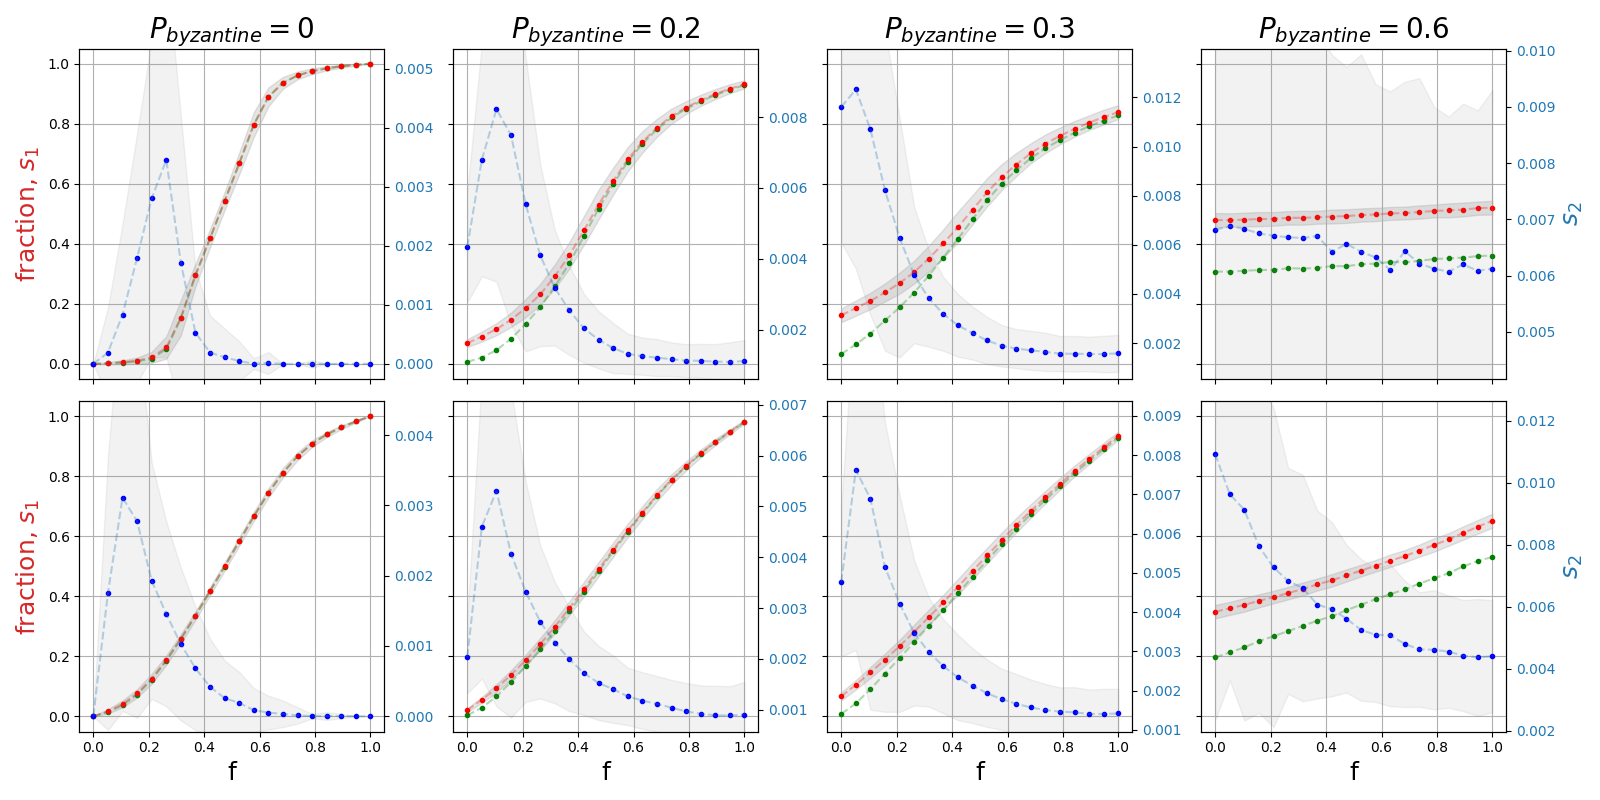

In [16]:
plt.close('different byzantine')
fig, (axs0, axs1) = plt.subplots(2, 4, num='different byzantine', figsize=(16, 8), sharey=True, sharex=True)

data = k4_data

fontsize=20

axs0[0].set_title("$P_{byzantine}=0$", fontsize=fontsize)
axs0[1].set_title("$P_{byzantine}=0.2$", fontsize=fontsize)
axs0[2].set_title("$P_{byzantine}=0.3$", fontsize=fontsize)
axs0[3].set_title("$P_{byzantine}=0.6$", fontsize=fontsize)

create_joined_plot(fig, axs0[0], data[data.byzantine_prob == 0].loc[0], plot_s2_err=True, show_xlabel=False, show_ylabel=True, show_2ylabel=False)
create_joined_plot(fig, axs0[1], data[data.byzantine_prob == 0.2].loc[0], plot_s2_err=True, show_xlabel=False, show_ylabel=False, show_2ylabel=False)
create_joined_plot(fig, axs0[2], data[data.byzantine_prob == 0.3].loc[0], plot_s2_err=True, show_xlabel=False, show_ylabel=False, show_2ylabel=False)
create_joined_plot(fig, axs0[3], data[data.byzantine_prob == 0.6].loc[0], plot_s2_err=True, show_xlabel=False, show_ylabel=False, show_2ylabel=True)

create_joined_plot(fig, axs1[0], data[data.byzantine_prob == 0].loc[1], plot_s2_err=True, show_xlabel=True, show_ylabel=True, show_2ylabel=False)
create_joined_plot(fig, axs1[1], data[data.byzantine_prob == 0.2].loc[1], plot_s2_err=True, show_xlabel=True, show_ylabel=False, show_2ylabel=False)
create_joined_plot(fig, axs1[2], data[data.byzantine_prob == 0.3].loc[1], plot_s2_err=True, show_xlabel=True, show_ylabel=False, show_2ylabel=False)
create_joined_plot(fig, axs1[3], data[data.byzantine_prob == 0.6].loc[1], plot_s2_err=True, show_xlabel=True, show_ylabel=False, show_2ylabel=True)

# axs0[0].get_legend().set_title("$P_{byzantine}=0$")
# axs0[1].get_legend().set_title("$P_{byzantine}=0.2$")
# axs0[2].get_legend().set_title("$P_{byzantine}=0.3$")
# axs0[3].get_legend().set_title("$P_{byzantine}=0.6$")
# axs1[0].get_legend().set_title("$P_{byzantine}=0$")
# axs1[1].get_legend().set_title("$P_{byzantine}=0.2$")
# axs1[2].get_legend().set_title("$P_{byzantine}=0.3$")
# axs1[3].get_legend().set_title("$P_{byzantine}=0.6$")

plt.savefig('figures/byzantine/sug01_fraction_s12_diff_byzantine_seq_2.png')

In [ ]:
plt.close('big different byzantine')
fig, (axs0, axs1, *oth_axs) = plt.subplots(5, 4, num='big different byzantine', figsize=(16, 20), sharey=True, sharex=True)

data = k4_data

fontsize=20

axs0[0].set_title("$P_{byzantine}=0$", fontsize=fontsize)
axs0[1].set_title("$P_{byzantine}=0.2$", fontsize=fontsize)
axs0[2].set_title("$P_{byzantine}=0.3$", fontsize=fontsize)
axs0[3].set_title("$P_{byzantine}=0.6$", fontsize=fontsize)

create_joined_plot(fig, axs0[0], data[data.byzantine_prob == 0].loc[0], plot_s2_err=True, show_xlabel=False, show_ylabel=True, show_2ylabel=False)
create_joined_plot(fig, axs0[1], data[data.byzantine_prob == 0.2].loc[0], plot_s2_err=True, show_xlabel=False, show_ylabel=False, show_2ylabel=False)
create_joined_plot(fig, axs0[2], data[data.byzantine_prob == 0.3].loc[0], plot_s2_err=True, show_xlabel=False, show_ylabel=False, show_2ylabel=False)
create_joined_plot(fig, axs0[3], data[data.byzantine_prob == 0.6].loc[0], plot_s2_err=True, show_xlabel=False, show_ylabel=False, show_2ylabel=True)

create_joined_plot(fig, axs1[0], data[data.byzantine_prob == 0].loc[1], plot_s2_err=True, show_xlabel=False, show_ylabel=True, show_2ylabel=False)
create_joined_plot(fig, axs1[1], data[data.byzantine_prob == 0.2].loc[1], plot_s2_err=True, show_xlabel=False, show_ylabel=False, show_2ylabel=False)
create_joined_plot(fig, axs1[2], data[data.byzantine_prob == 0.3].loc[1], plot_s2_err=True, show_xlabel=False, show_ylabel=False, show_2ylabel=False)
create_joined_plot(fig, axs1[3], data[data.byzantine_prob == 0.6].loc[1], plot_s2_err=True, show_xlabel=False, show_ylabel=False, show_2ylabel=True)

for sug, axs in zip(k4_other_data.index.unique()[:-1], oth_axs[:-1], strict=True):
    create_joined_plot(fig, axs[0], k4_other_data[k4_other_data.byzantine_prob == 0].loc[sug], plot_s2_err=True, show_xlabel=False, show_ylabel=True, show_2ylabel=False)
    create_joined_plot(fig, axs[1], k4_other_data[k4_other_data.byzantine_prob == 0.2].loc[sug], plot_s2_err=True, show_xlabel=False, show_ylabel=False, show_2ylabel=False)
    create_joined_plot(fig, axs[2], k4_other_data[k4_other_data.byzantine_prob == 0.3].loc[sug], plot_s2_err=True, show_xlabel=False, show_ylabel=False, show_2ylabel=False)
    create_joined_plot(fig, axs[3], k4_other_data[k4_other_data.byzantine_prob == 0.6].loc[sug], plot_s2_err=True, show_xlabel=False, show_ylabel=False, show_2ylabel=True)

axs = oth_axs[-1]
sug = k4_other_data.index.unique()[-1]
create_joined_plot(fig, axs[0], k4_other_data[k4_other_data.byzantine_prob == 0].loc[sug], plot_s2_err=True, show_xlabel=True, show_ylabel=True, show_2ylabel=True)
create_joined_plot(fig, axs[1], k4_other_data[k4_other_data.byzantine_prob == 0.2].loc[sug], plot_s2_err=True, show_xlabel=True, show_ylabel=False, show_2ylabel=True)
create_joined_plot(fig, axs[2], k4_other_data[k4_other_data.byzantine_prob == 0.3].loc[sug], plot_s2_err=True, show_xlabel=True, show_ylabel=False, show_2ylabel=True)
create_joined_plot(fig, axs[3], k4_other_data[k4_other_data.byzantine_prob == 0.6].loc[sug], plot_s2_err=True, show_xlabel=True, show_ylabel=False, show_2ylabel=True)
# axs0[0].get_legend().set_title("$P_{byzantine}=0$")
# axs0[1].get_legend().set_title("$P_{byzantine}=0.2$")
# axs0[2].get_legend().set_title("$P_{byzantine}=0.3$")
# axs0[3].get_legend().set_title("$P_{byzantine}=0.6$")
# axs1[0].get_legend().set_title("$P_{byzantine}=0$")
# axs1[1].get_legend().set_title("$P_{byzantine}=0.2$")
# axs1[2].get_legend().set_title("$P_{byzantine}=0.3$")
# axs1[3].get_legend().set_title("$P_{byzantine}=0.6$")

plt.savefig('figures/byzantine/sug0_6_fraction_s12_diff_byzantine_seq_2.png')

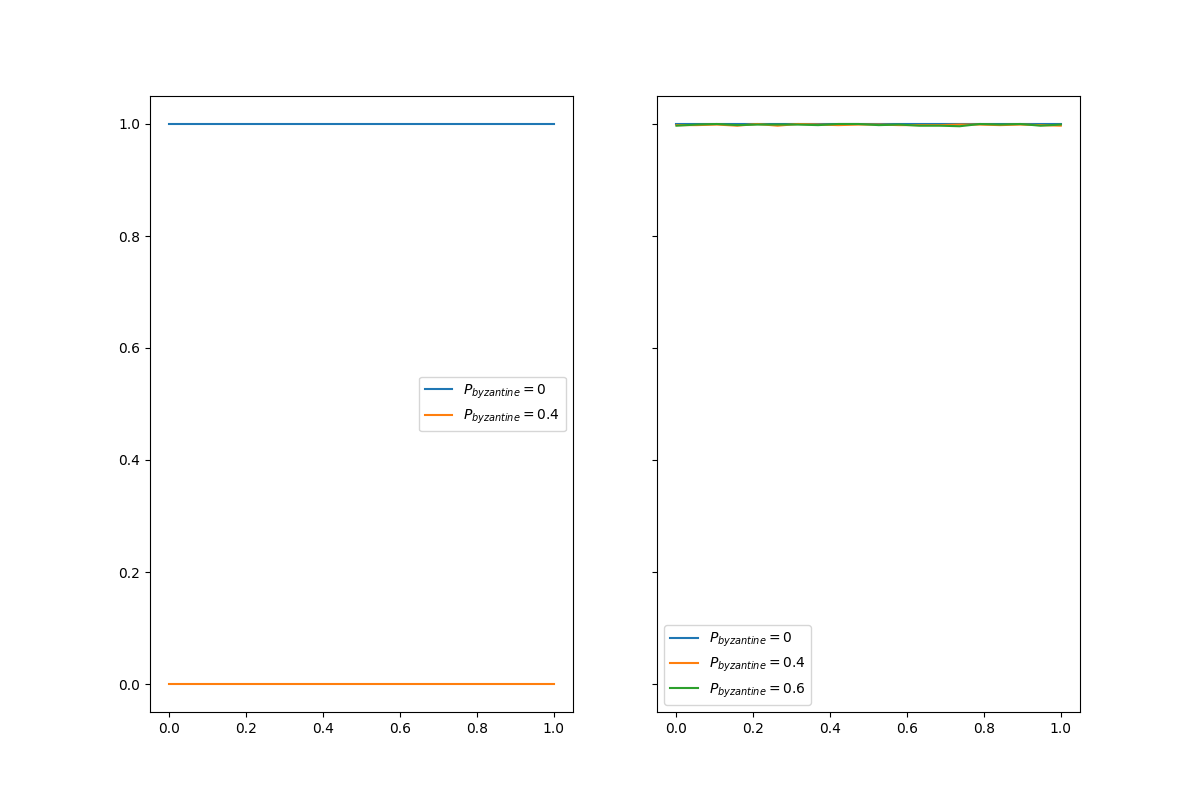

In [36]:
plt.close('stability')
fig, (ax0, ax1) = plt.subplots(1, 2, num='stability', figsize=(12, 8), sharey=True, sharex=True)

data = k4_data
field = 'stable_mean'

ax0.plot(data[data.byzantine_prob == 0].loc[0].f, data[data.byzantine_prob == 0].loc[0][field], label="$P_{byzantine}=0$")
ax0.plot(data[data.byzantine_prob == 0.2].loc[0].f, data[data.byzantine_prob == 0.4].loc[0][field], label="$P_{byzantine}=0.4$")
# ax0.plot(data[data.byzantine_prob == 0.3].loc[0].f, data[data.byzantine_prob == 0.6].loc[0][field], label="$P_{byzantine}=0.6$")

ax1.plot(data[data.byzantine_prob == 0].loc[1].f, data[data.byzantine_prob == 0].loc[1, field], label="$P_{byzantine}=0$")
ax1.plot(data[data.byzantine_prob == 0.2].loc[1].f, data[data.byzantine_prob == 0.4].loc[1, field], label="$P_{byzantine}=0.4$")
ax1.plot(data[data.byzantine_prob == 0.3].loc[1].f, data[data.byzantine_prob == 0.6].loc[1, field], label="$P_{byzantine}=0.6$")
ax0.legend()
ax1.legend()
plt.show()

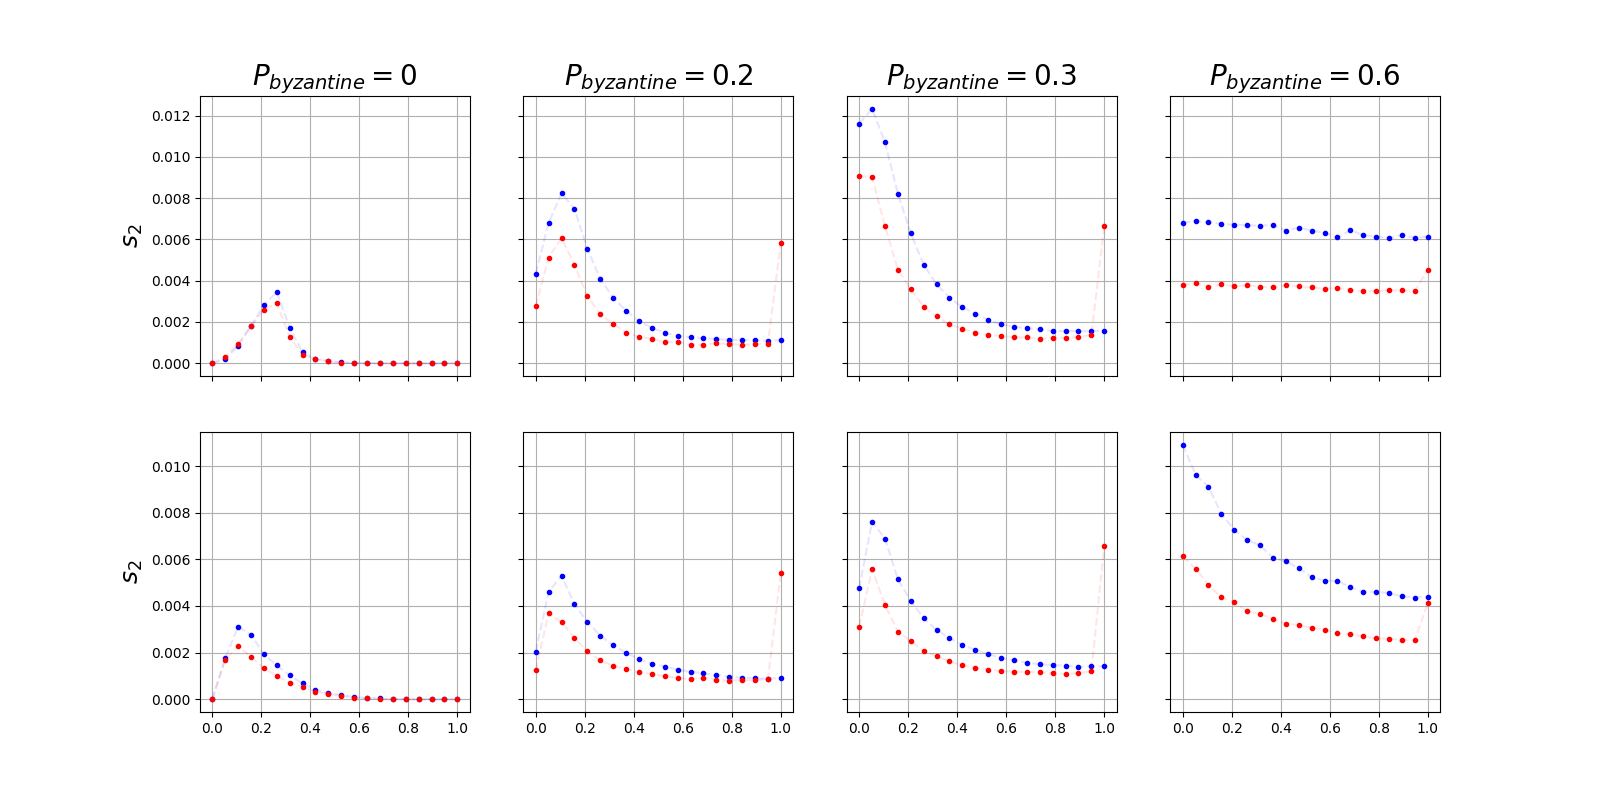

In [17]:
plt.close('1000 vs 2000')
fig, (axs0, axs1) = plt.subplots(2, 4, num='1000 vs 2000', figsize=(16, 8), sharey='row', sharex=True)

# data = k4_data_parallel
field = 's2_mean'
label = '$s_2$'
byz_prob = [0, 0.2, 0.3, 0.6]

for axs, sug in zip([axs0, axs1], [0, 1]):
    for ax, p_byz in zip(axs, byz_prob):
        line1 = ax.plot(
            k4_data[k4_data_big.byzantine_prob == p_byz].loc[0].f,
            k4_data[k4_data.byzantine_prob == p_byz].loc[sug][field],
            'b.',
            label='1000 nodes'
        )
        ax.plot(
            k4_data[k4_data_big.byzantine_prob == p_byz].loc[0].f,
            k4_data[k4_data.byzantine_prob == p_byz].loc[sug][field],
            'b--',
            alpha=0.1
        )
        line2 = ax.plot(
            k4_data_big[k4_data_big.byzantine_prob == p_byz].loc[0].f,
            k4_data_big[k4_data_big.byzantine_prob == p_byz].loc[sug][field],
            'r.',
            label='2000 nodes'
        )
        ax.plot(
            k4_data_big[k4_data_big.byzantine_prob == p_byz].loc[0].f,
            k4_data_big[k4_data_big.byzantine_prob == p_byz].loc[sug][field],
            'r--',
            alpha=0.1
        )
        ax.grid()
# ax.legend()

for ax, p_byz in zip(axs0, byz_prob):
    ax.set_title(f"$P_{{byzantine}}={p_byz}$", fontsize=20)

axs0[0].set_ylabel(label, fontsize=18)
axs1[0].set_ylabel(label, fontsize=18)
plt.savefig('figures/byzantine/sug01_1000_vs_2000.png')

In [16]:
k4_data.byzantine_prob.unique()

array([0. , 0.4, 0.6, 0.2, 0.3])

In [55]:
ax.set_title('fraction')

Text(0.5, 1.0, 'fraction')